In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objs as go 
import plotly.offline as py 
import math

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone 
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb

In [18]:
import os
os.chdir("C:\\uit\\elliptic\\Elliptic_Dataset")
print("\nTransaction features: \n")
df_txs_features = pd.read_csv("txs_features.csv")
print(df_txs_features)

print("\nTransaction classes: \n")
df_txs_classes = pd.read_csv("txs_classes.csv")
print(df_txs_classes)

print("\nTransaction-Transaction edgelist: \n")
df_txs_edgelist = pd.read_csv("txs_edgelist.csv")

print(df_txs_edgelist)


Transaction features: 

             txId  Time step  Local_feature_1  Local_feature_2  \
0            3321          1        -0.169615        -0.184668   
1           11108          1        -0.137586        -0.184668   
2           51816          1        -0.170103        -0.184668   
3           68869          1        -0.114267        -0.184668   
4           89273          1         5.202107        -0.210553   
...           ...        ...              ...              ...   
203764  158304003         49        -0.165622        -0.139563   
203765  158303998         49        -0.167040        -0.139563   
203766  158303966         49        -0.167040        -0.139563   
203767  161526077         49        -0.172212        -0.139573   
203768  194103537         49        -0.172212        -0.139573   

        Local_feature_3  Local_feature_4  Local_feature_5  Local_feature_6  \
0             -1.201369        -0.121970        -0.043875        -0.113002   
1             -1.201369   

In [19]:
print("\ntxs_features.csv for txId = 272145560\n")
print(df_txs_features[df_txs_features['txId']==272145560])

print("\ntxs_classes.csv for txId = 272145560\n")
print(df_txs_classes[df_txs_classes['txId']==272145560])

print("\ntxs_edgelist.csv for txId = 272145560\n")
df_txs_edgelist[(df_txs_edgelist['txId1']==272145560) | (df_txs_edgelist['txId2']==272145560)]


txs_features.csv for txId = 272145560

             txId  Time step  Local_feature_1  Local_feature_2  \
105573  272145560         24        -0.155493        -0.107012   

        Local_feature_3  Local_feature_4  Local_feature_5  Local_feature_6  \
105573        -1.201369         -0.12197        -0.043875        -0.113002   

        Local_feature_7  Local_feature_8  ...  in_BTC_min  in_BTC_max  \
105573        -0.061584        -0.145749  ...      2.7732      2.7732   

        in_BTC_mean  in_BTC_median  in_BTC_total  out_BTC_min  out_BTC_max  \
105573       2.7732         2.7732        2.7732     0.001917     2.770883   

        out_BTC_mean  out_BTC_median  out_BTC_total  
105573        1.3864          1.3864         2.7728  

[1 rows x 184 columns]

txs_classes.csv for txId = 272145560

             txId  class
105573  272145560      1

txs_edgelist.csv for txId = 272145560



,txId1,txId2
123072,272145560,296926618
123272,272145560,272145556
125873,299475624,272145560


In [20]:
df_txs_features = df_txs_features.merge(df_txs_classes, left_on = "txId" , right_on = "txId" , how = "left")
# print(txs.shape)

print(df_txs_features["class"].value_counts())

class
3    157205
2     42019
1      4545
Name: count, dtype: int64


In [21]:
df_txs_features = df_txs_features.dropna()
df_txs_features

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202799,194747812,49,0.558398,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.584665,...,115.952889,115.952889,115.952889,115.952889,1.653300e+00,114.299544,57.976422,57.976422,115.952844,3
202800,194747925,49,0.547658,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.573676,...,114.250098,114.250098,114.250098,114.250098,2.035300e-02,114.229700,57.125027,57.125027,114.250053,3
202801,194748063,49,0.543600,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.569524,...,113.606771,113.606771,113.606771,113.606771,9.257490e-01,112.680977,56.803363,56.803363,113.606726,3
202802,194748070,49,0.537760,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.563549,...,112.680977,112.680977,112.680977,112.680977,3.026970e-01,112.378235,56.340466,56.340466,112.680932,3


In [22]:
for column in df_txs_features.columns[168:]:
    if column != "class":
        feature = np.array(df_txs_features[column]).reshape(-1,1)
        scaler = MinMaxScaler()
        scaler.fit(feature)
        feature_scaled = scaler.transform(feature)
        df_txs_features[column] = feature_scaled.reshape(1,-1)[0]

In [23]:
# remove 'unknown' transactions
data = df_txs_features["txId"] #.loc[(df_txs_features['class'] != 3), 'txId']
df_txs_features_selected = df_txs_features.loc[df_txs_features['txId'].isin(data)]
print(df_txs_features_selected["class"].value_counts())

class
3    156759
2     41500
1      4545
Name: count, dtype: int64


In [24]:
df_txs_features_selected

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.000047,0.000047,0.000047,0.000047,8.301504e-05,0.000032,0.000089,8.904096e-05,0.000047,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,0.000493,0.000493,0.000493,0.000493,2.915711e-04,0.000444,0.000936,9.357923e-04,0.000493,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.000040,0.000040,0.000040,0.000040,1.134016e-04,0.000020,0.000076,7.612341e-05,0.000040,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,0.000702,0.000272,0.000088,0.000817,6.113009e-04,0.000714,0.001552,1.552291e-03,0.000817,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,0.074805,0.074805,0.074805,0.074805,6.466160e-11,0.003648,0.000022,1.451405e-07,0.074805,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202799,194747812,49,0.558398,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.584665,...,0.010179,0.010179,0.010179,0.010179,8.223464e-04,0.010104,0.019336,1.933576e-02,0.010179,3
202800,194747925,49,0.547658,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.573676,...,0.010029,0.010029,0.010029,0.010029,1.012352e-05,0.010098,0.019052,1.905181e-02,0.010029,3
202801,194748063,49,0.543600,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.569524,...,0.009973,0.009973,0.009973,0.009973,4.604647e-04,0.009961,0.018945,1.894453e-02,0.009973,3
202802,194748070,49,0.537760,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.563549,...,0.009891,0.009891,0.009891,0.009891,1.505606e-04,0.009935,0.018790,1.879015e-02,0.009891,3


In [25]:
# Goal: binary classification of 0,1
# 0: licit, 1: illicit

X_data = df_txs_features_selected.loc[(df_txs_features_selected['Time step'] < 35) & (df_txs_features_selected['class'] != 3), 'txId']
X_training_timesteps = df_txs_features_selected.loc[df_txs_features_selected['txId'].isin(X_data)]
X_train = X_training_timesteps.drop(columns=['txId', 'class', 'Time step'])

X_data_test = df_txs_features_selected.loc[(df_txs_features_selected['Time step'] >= 35), 'txId']
X_testing_timesteps = df_txs_features_selected.loc[df_txs_features_selected['txId'].isin(X_data_test)]
X_test = X_testing_timesteps.drop(columns=['txId', 'class', 'Time step'])

X_data_test_class01 = df_txs_features_selected.loc[(df_txs_features_selected['Time step'] >= 35) & (df_txs_features_selected['class'] != 3), 'txId']
X_testing_timesteps_class01 = df_txs_features_selected.loc[df_txs_features_selected['txId'].isin(X_data_test_class01)]
X_test_class01 = X_testing_timesteps_class01.drop(columns=['txId', 'class', 'Time step'])

y_training_timesteps = X_training_timesteps[['class']]
y_training_timesteps = y_training_timesteps['class'].apply(lambda x: x-1 ) # change illicit (class-2) to '0' for classification
y_train = y_training_timesteps

y_testing_timesteps = X_testing_timesteps[['class']]
y_testing_timesteps = y_testing_timesteps['class'].apply(lambda x: x-1 ) # change illicit (class-2) to '0' for classification
y_test = y_testing_timesteps

y_testing_timesteps_class01 = X_testing_timesteps_class01[['class']]
y_testing_timesteps_class01 = y_testing_timesteps_class01['class'].apply(lambda x: x-1 ) # change illicit (class-2) to '0' for classification
y_test_class01 = y_testing_timesteps_class01

In [26]:
y_train.value_counts()

class
1    26237
0     3462
Name: count, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)


In [28]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support, f1_score, confusion_matrix

# 1. Không cần chuẩn hóa vì dữ liệu đã được chuẩn hóa
X_train_scaled = X_train  # Sử dụng trực tiếp X_train
X_test_scaled = X_test_class01  # Sử dụng trực tiếp X_test_class01

# 2. Áp dụng PCA với tỷ lệ phương sai 95%
pca = PCA(n_components=0.95)  # Tự động chọn số PC để giữ 95% phương sai
X_train_pca = pca.fit_transform(X_train_scaled)  # Scores của tập train
X_test_pca = pca.transform(X_test_scaled)  # Scores của tập test

# 3. In số lượng PC được chọn
print(f"Số lượng PC được chọn: {pca.n_components_}")

# 4. Tái cấu trúc dữ liệu
# Train: Tính lỗi tái cấu trúc cho tập train để xác định ngưỡng
X_train_recon = np.dot(X_train_pca, pca.components_)  # Tái cấu trúc: ZW^T
train_reconstruction_error = np.sqrt(np.sum((X_train_scaled - X_train_recon) ** 2, axis=1))

# Test: Tái cấu trúc tập test
X_test_recon = np.dot(X_test_pca, pca.components_)  # Tái cấu trúc: ZW^T
test_reconstruction_error = np.sqrt(np.sum((X_test_scaled - X_test_recon) ** 2, axis=1))

# 5. Xác định ngưỡng từ tập train (phân vị 95%)
threshold = np.percentile(train_reconstruction_error, 30)
print(f"Ngưỡng lỗi tái cấu trúc (từ tập train): {threshold}")

# 6. Phân loại bất thường trên tập test
y_preds_pca = (test_reconstruction_error > threshold).astype(int)  # 1: bất thường, 0: bình thường

# 7. Đánh giá hiệu suất
prec, rec, f1, num = precision_recall_fscore_support(y_test_class01.values, y_preds_pca, labels=[0, 1])
print("PCA Anomaly Detection (95% Variance)")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f" % (prec[0], rec[0], f1[0]))
micro_f1 = f1_score(y_test_class01.values, y_preds_pca, average='micro')
print("Micro-Average F1 Score: %.3f" % (micro_f1))

# 8. Ma trận nhầm lẫn
cm = confusion_matrix(y_test_class01.values, y_preds_pca, labels=[0, 1])
print("Confusion Matrix:\n", cm)

Số lượng PC được chọn: 47
Ngưỡng lỗi tái cấu trúc (từ tập train): 5.023830278018481
PCA Anomaly Detection (95% Variance)
Precision: 0.255 
Recall: 0.550 
F1 Score: 0.348
Micro-Average F1 Score: 0.863
Confusion Matrix:
 [[  596   487]
 [ 1745 13518]]


(16346,)
Z-SCORE/STANDARD DEVIATION ANOMALY DETECTION

Detailed per-class evaluation:
Class 0 (Illicit):
 Precision: 0.018
 Recall: 0.119
 F1 Score: 0.031
 Support: 1083

Class 1 (Licit):
 Precision: 0.894
 Recall: 0.529
 F1 Score: 0.665
 Support: 15263



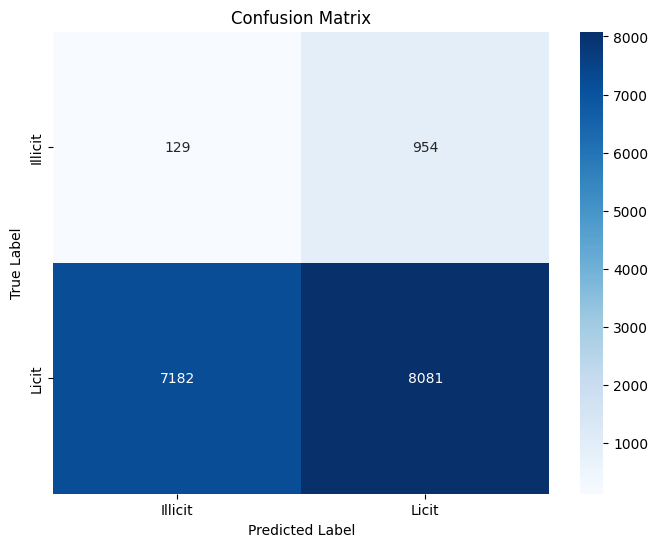

Overall Evaluation:

Micro-Average F1 Score: 0.502

Macro-Average F1 Score: 0.348
Weighted-Average F1 Score: 0.623
Overall Accuracy: 0.502

Confusion Matrix Analysis:
Class 0 (Illicit):
 True Positives: 129 (11.9% of class 0 samples)
 False Positives: 7182
 False Negatives: 954

Class 1 (Licit):
 True Positives: 8081 (52.9% of class 1 samples)
 False Positives: 954
 False Negatives: 7182



In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time



# Hàm tính Z-Score cho từng feature
def compute_z_scores(train_data, train_labels, test_data, threshold=3.0):
    licit_mask = (train_labels == 1)
    licit_train_data = train_data[licit_mask].values  # Chuyển sang numpy array
    if len(licit_train_data) == 0:
        return np.zeros(len(test_data))

    n_features = train_data.shape[1]
    anomaly_scores = np.zeros(len(test_data))

    for feature_idx in range(n_features):
        # Tính trung bình và độ lệch chuẩn trên dữ liệu licit
        train_feature = licit_train_data[:, feature_idx]
        mean_train = np.mean(train_feature)
        std_train = np.std(train_feature) if np.std(train_feature) > 0 else 1e-10  # Tránh chia cho 0

        # Tính Z-Score trên test data
        test_feature = test_data.values[:, feature_idx]
        z_scores = np.abs((test_feature - mean_train) / std_train)
        anomaly_scores += (z_scores > threshold).astype(int)

    return anomaly_scores

# Tham số
threshold = 1.5  # Ngưỡng Z-Score (thường là 3 cho 99.7% dữ liệu)
threshold_ratio = 0.1  # Ngưỡng tỷ lệ đặc trưng bất thường

# Tính số điểm bất thường
anomaly_scores = compute_z_scores(X_train, y_train.values, X_test_class01, threshold)

# Phát hiện bất thường
n_features = X_train.shape[1]
anomaly_threshold = threshold_ratio * n_features
y_preds_anomaly = (anomaly_scores > anomaly_threshold).astype(int)  # 1 nếu bình thường, 0 nếu bất thường
y_preds_anomaly = 1 - y_preds_anomaly  # Đảo ngược để 0 là illicit

# Đảm bảo độ dài khớp với y_test_class01
if len(y_preds_anomaly) != len(y_test_class01):
    raise ValueError("Length mismatch between predictions and true labels")


# In shape của test set
print(y_test_class01.shape)

# Tính precision, recall, F1 score, và support
prec, rec, f1, num = precision_recall_fscore_support(y_test_class01.values, y_preds_anomaly, labels=[0, 1])

# In đánh giá chi tiết cho từng class
print("Z-SCORE/STANDARD DEVIATION ANOMALY DETECTION\n")
print("Detailed per-class evaluation:")
for i, label in enumerate([0, 1]):
    label_name = "Illicit" if label == 0 else "Licit"
    print(f"Class {label} ({label_name}):")
    print(f" Precision: {prec[i]:.3f}")
    print(f" Recall: {rec[i]:.3f}")
    print(f" F1 Score: {f1[i]:.3f}")
    print(f" Support: {num[i]}")
    print()

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test_class01.values, y_preds_anomaly, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Illicit', 'Licit'], yticklabels=['Illicit', 'Licit'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Đánh giá tổng quát
print("Overall Evaluation:\n")

# Micro-average F1 score
micro_f1 = f1_score(y_test_class01.values, y_preds_anomaly, average='micro')
print("Micro-Average F1 Score: %.3f\n" % micro_f1)

# Macro-average F1 score
macro_f1 = f1_score(y_test_class01.values, y_preds_anomaly, average='macro')
print(f"Macro-Average F1 Score: {macro_f1:.3f}")

# Weighted-average F1 score
weighted_f1 = f1_score(y_test_class01.values, y_preds_anomaly, average='weighted')
print(f"Weighted-Average F1 Score: {weighted_f1:.3f}")

# Accuracy from confusion matrix
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Overall Accuracy: {accuracy:.3f}")

# Phân tích ma trận nhầm lẫn
print("\nConfusion Matrix Analysis:")
total_samples = np.sum(cm)
for i, label in enumerate([0, 1]):
    label_name = "Illicit" if label == 0 else "Licit"
    true_positives = cm[i, i]
    false_positives = np.sum(cm[:, i]) - true_positives
    false_negatives = np.sum(cm[i, :]) - true_positives
    print(f"Class {label} ({label_name}):")
    print(f" True Positives: {true_positives} ({(true_positives / num[i] * 100):.1f}% of class {label} samples)")
    print(f" False Positives: {false_positives}")
    print(f" False Negatives: {false_negatives}")
    print()

(16346,)
INTERQUARTILE RANGE (IQR) ANOMALY DETECTION

Detailed per-class evaluation:
Class 0 (Illicit):
 Precision: 0.025
 Recall: 0.224
 F1 Score: 0.044
 Support: 1083

Class 1 (Licit):
 Precision: 0.870
 Recall: 0.370
 F1 Score: 0.519
 Support: 15263



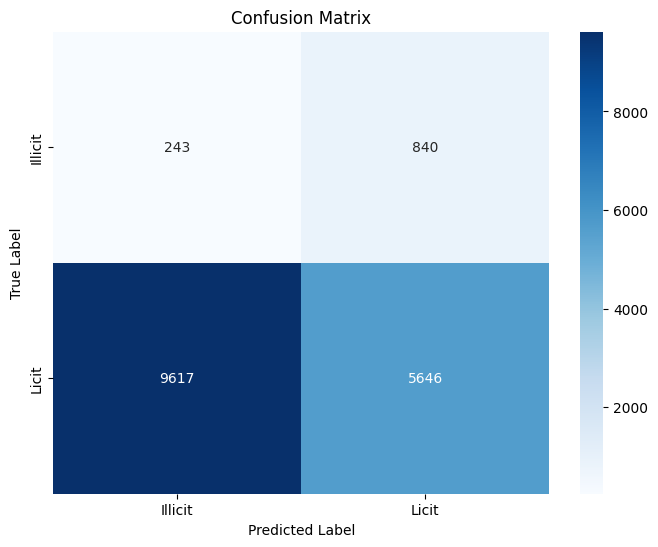

Overall Evaluation:

Micro-Average F1 Score: 0.360

Macro-Average F1 Score: 0.282
Weighted-Average F1 Score: 0.488
Overall Accuracy: 0.360

Confusion Matrix Analysis:
Class 0 (Illicit):
 True Positives: 243 (22.4% of class 0 samples)
 False Positives: 9617
 False Negatives: 840

Class 1 (Licit):
 True Positives: 5646 (37.0% of class 1 samples)
 False Positives: 840
 False Negatives: 9617



In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Hàm tính IQR và phát hiện bất thường cho từng feature
def compute_iqr_scores(train_data, train_labels, test_data, multiplier=1.5):
    licit_mask = (train_labels == 1)
    licit_train_data = train_data[licit_mask].values  # Chuyển sang numpy array
    if len(licit_train_data) == 0:
        return np.zeros(len(test_data))

    n_features = train_data.shape[1]
    anomaly_scores = np.zeros(len(test_data))

    for feature_idx in range(n_features):
        # Tính Q1, Q3, và IQR trên dữ liệu licit
        train_feature = licit_train_data[:, feature_idx]
        q1 = np.percentile(train_feature, 25)
        q3 = np.percentile(train_feature, 75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr

        # Tính IQR score trên test data
        test_feature = test_data.values[:, feature_idx]
        anomaly_scores += ((test_feature < lower_bound) | (test_feature > upper_bound)).astype(int)

    return anomaly_scores

# Tham số
multiplier = 1.5  # Hệ số nhân cho IQR (thường là 1.5, có thể tăng lên 3)
threshold_ratio = 0.1  # Ngưỡng tỷ lệ đặc trưng bất thường

# Tính số điểm bất thường
anomaly_scores = compute_iqr_scores(X_train, y_train.values, X_test_class01, multiplier)

# Phát hiện bất thường
n_features = X_train.shape[1]
anomaly_threshold = threshold_ratio * n_features
y_preds_anomaly = (anomaly_scores > anomaly_threshold).astype(int)  # 1 nếu bình thường, 0 nếu bất thường
y_preds_anomaly = 1 - y_preds_anomaly  # Đảo ngược để 0 là illicit

# Đảm bảo độ dài khớp với y_test_class01
if len(y_preds_anomaly) != len(y_test_class01):
    raise ValueError("Length mismatch between predictions and true labels")


# In shape của test set
print(y_test_class01.shape)

# Tính precision, recall, F1 score, và support
prec, rec, f1, num = precision_recall_fscore_support(y_test_class01.values, y_preds_anomaly, labels=[0, 1])

# In đánh giá chi tiết cho từng class
print("INTERQUARTILE RANGE (IQR) ANOMALY DETECTION\n")
print("Detailed per-class evaluation:")
for i, label in enumerate([0, 1]):
    label_name = "Illicit" if label == 0 else "Licit"
    print(f"Class {label} ({label_name}):")
    print(f" Precision: {prec[i]:.3f}")
    print(f" Recall: {rec[i]:.3f}")
    print(f" F1 Score: {f1[i]:.3f}")
    print(f" Support: {num[i]}")
    print()

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test_class01.values, y_preds_anomaly, labels=[0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Illicit', 'Licit'], yticklabels=['Illicit', 'Licit'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Đánh giá tổng quát
print("Overall Evaluation:\n")

# Micro-average F1 score
micro_f1 = f1_score(y_test_class01.values, y_preds_anomaly, average='micro')
print("Micro-Average F1 Score: %.3f\n" % micro_f1)

# Macro-average F1 score
macro_f1 = f1_score(y_test_class01.values, y_preds_anomaly, average='macro')
print(f"Macro-Average F1 Score: {macro_f1:.3f}")

# Weighted-average F1 score
weighted_f1 = f1_score(y_test_class01.values, y_preds_anomaly, average='weighted')
print(f"Weighted-Average F1 Score: {weighted_f1:.3f}")

# Accuracy from confusion matrix
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"Overall Accuracy: {accuracy:.3f}")

# Phân tích ma trận nhầm lẫn
print("\nConfusion Matrix Analysis:")
total_samples = np.sum(cm)
for i, label in enumerate([0, 1]):
    label_name = "Illicit" if label == 0 else "Licit"
    true_positives = cm[i, i]
    false_positives = np.sum(cm[:, i]) - true_positives
    false_negatives = np.sum(cm[i, :]) - true_positives
    print(f"Class {label} ({label_name}):")
    print(f" True Positives: {true_positives} ({(true_positives / num[i] * 100):.1f}% of class {label} samples)")
    print(f" False Positives: {false_positives}")
    print(f" False Negatives: {false_negatives}")
    print()